# **High Frequency Words**  
**Group Members: Jacob Silver, Justin Williams, Gregg Maloy**    
This is an introduction to natural language processing (NLP) using python.  Concepts of word tokenization, stop words, word frequency and Zipf's Law will be reviewed. We will make use of the popular children's book 'Alice in Wonderland' by Lewis Carroll.  

**Step 1: Load Data and Initial Data Inspection**    
Packages utilized for this analysis included matplotlib, NLTK, pandas and statistics.  'Alice in Wonderland' comes prepackaged in the NLTK package. Below are some summary statistics.  Before cleaning the corpus, the total word count equals 34,110 words, with 3,016 of those words being unique words.  Upon inspection of the first 10 records of the dataset, it becomes apparent that some of the 'words' are not actual words.  The corpus will need to be cleaned to exclude numbers, symbols and common stop words. 

In [46]:
# Access the Gutenberg corpus
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import re

awl = gutenberg.words('carroll-alice.txt')

# Calculate summary statistics
total_words = len(awl)
unique_words = len(set(awl))

# Print summary statistics
print("Summary Statistics:")
print("Total Words:", total_words)
print("Unique Words:", unique_words)

print("First 10 words:")
for word in awl[:25]:
    print(word)

Summary Statistics:
Total Words: 34110
Unique Words: 3016
First 10 words:
[
Alice
'
s
Adventures
in
Wonderland
by
Lewis
Carroll
1865
]
CHAPTER
I
.
Down
the
Rabbit
-
Hole
Alice
was
beginning
to
get


**Part 2: Tokenization & Removal of Stop Words, Numbers and Symbols**    
Below the word list is converted to a string and words are tokenized via the NLTK package.  Tokenization involves segmenting unstructured data into discrete units taking into consideration the nuance of different languages. We first exclude numbers and symbols from the analysis.  Words were then grouped according to frequency of occurrence.  Upon inspection of the resulting dataframe, we see the most frequently occurring word is 'the', which occurs 1642 times in the corpus, followed by the word 'and' which occurs 872 times.  

In [47]:
awl_text = ' '.join(awl)  # Convert the list of words to a single string
text_tokens = word_tokenize(awl_text)

# Convert words to lowercase
words = [token.lower() for token in text_tokens]

# Get the list of stop words
#stop_words = set(stopwords.words('english'))

# Function to check if a word consists only of alphabetic characters
def is_alphabetic(word):
    return bool(re.match('^[a-zA-Z]+$', word))

# Filter out stop words, numbers, and symbols
filtered_words = [word for word in words if is_alphabetic(word)] #and word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = nltk.Counter(filtered_words)

# Calculate summary statistics
total_words = len(filtered_words)
unique_words = len(set(word_counts))


# Print summary statistics
print("Summary Statistics:")
print("Total Words:", total_words)
print("Unique Words:", unique_words)


# Print the sorted word counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts[:10]:    
    print(word, count)

Summary Statistics:
Total Words: 27334
Unique Words: 2568
the 1642
and 872
to 729
a 632
it 595
she 553
i 543
of 514
said 462
you 411


In [48]:

# Get the list of stop words
stop_words = set(stopwords.words('english'))


# Filter out stop words from filtered_words
filtered_word_no_sw = [word for word in filtered_words if word[0] not in stop_words]
#len(filtered_word_no_sw)

# Filter out stop words from sorted_word_counts
filtered_word_counts = [(word, count) for word, count in sorted_word_counts if word not in stop_words]
     
# Calculate summary statistics
total_words = len(filtered_word_no_sw)
unique_words = len(set(filtered_word_counts))

top_words_sum = sum(count for _, count in filtered_word_counts[:25])
top_words_sum_50 = sum(count for _, count in filtered_word_counts[:50])
top_words_sum_75 = sum(count for _, count in filtered_word_counts[:75])
top_words_sum_100 = sum(count for _, count in filtered_word_counts[:100])
top_words_sum_120 = sum(count for _, count in filtered_word_counts[:120])
top_words_sum_122 = sum(count for _, count in filtered_word_counts[:122])
top_words_sum_123 = sum(count for _, count in filtered_word_counts[:123])
top_words_sum_125 = sum(count for _, count in filtered_word_counts[:125])
top_words_sum_200 = sum(count for _, count in filtered_word_counts[:200])





# Print summary statistics
print("Filtered Corpus Summary Statistics:")
print("Total Words:", total_words)
print("Unique Words:", unique_words)

# Print the filtered results
print("Top 10 Most Frequently Occurring Words:")
for word, count in filtered_word_counts[:10]:
    print(word, count)

print("Sum of Top 25 Most Frequently Ocurring Words:", top_words_sum)
print("Sum of Top 50 Most Frequently Ocurring Words:", top_words_sum_50)
print("Sum of Top 75 Most Frequently Ocurring Words:", top_words_sum_75)
print("Sum of Top 100 Most Frequently Ocurring Words:", top_words_sum_100)
print("Sum of Top 120 Most Frequently Ocurring Words:", top_words_sum_120)
print("Sum of Top 122 Most Frequently Ocurring Words:", top_words_sum_122)
print("Sum of Top 123 Most Frequently Ocurring Words:", top_words_sum_123)
print("Sum of Top 125 Most Frequently Ocurring Words:", top_words_sum_125)
print("Sum of Top 200 Most Frequently Ocurring Words:", top_words_sum_200)


Filtered Corpus Summary Statistics:
Total Words: 10684
Unique Words: 2422
Top 10 Most Frequently Occurring Words:
said 462
alice 398
little 128
one 104
know 88
like 85
would 83
went 83
could 77
queen 75
Sum of Top 25 Most Frequently Ocurring Words: 2471
Sum of Top 50 Most Frequently Ocurring Words: 3559
Sum of Top 75 Most Frequently Ocurring Words: 4315
Sum of Top 100 Most Frequently Ocurring Words: 4916
Sum of Top 120 Most Frequently Ocurring Words: 5303
Sum of Top 122 Most Frequently Ocurring Words: 5339
Sum of Top 123 Most Frequently Ocurring Words: 5357
Sum of Top 125 Most Frequently Ocurring Words: 5392
Sum of Top 200 Most Frequently Ocurring Words: 6467


Below the top 200 most frequently occurring words are plotted on a bar chart. Count and percentage are also displayed.

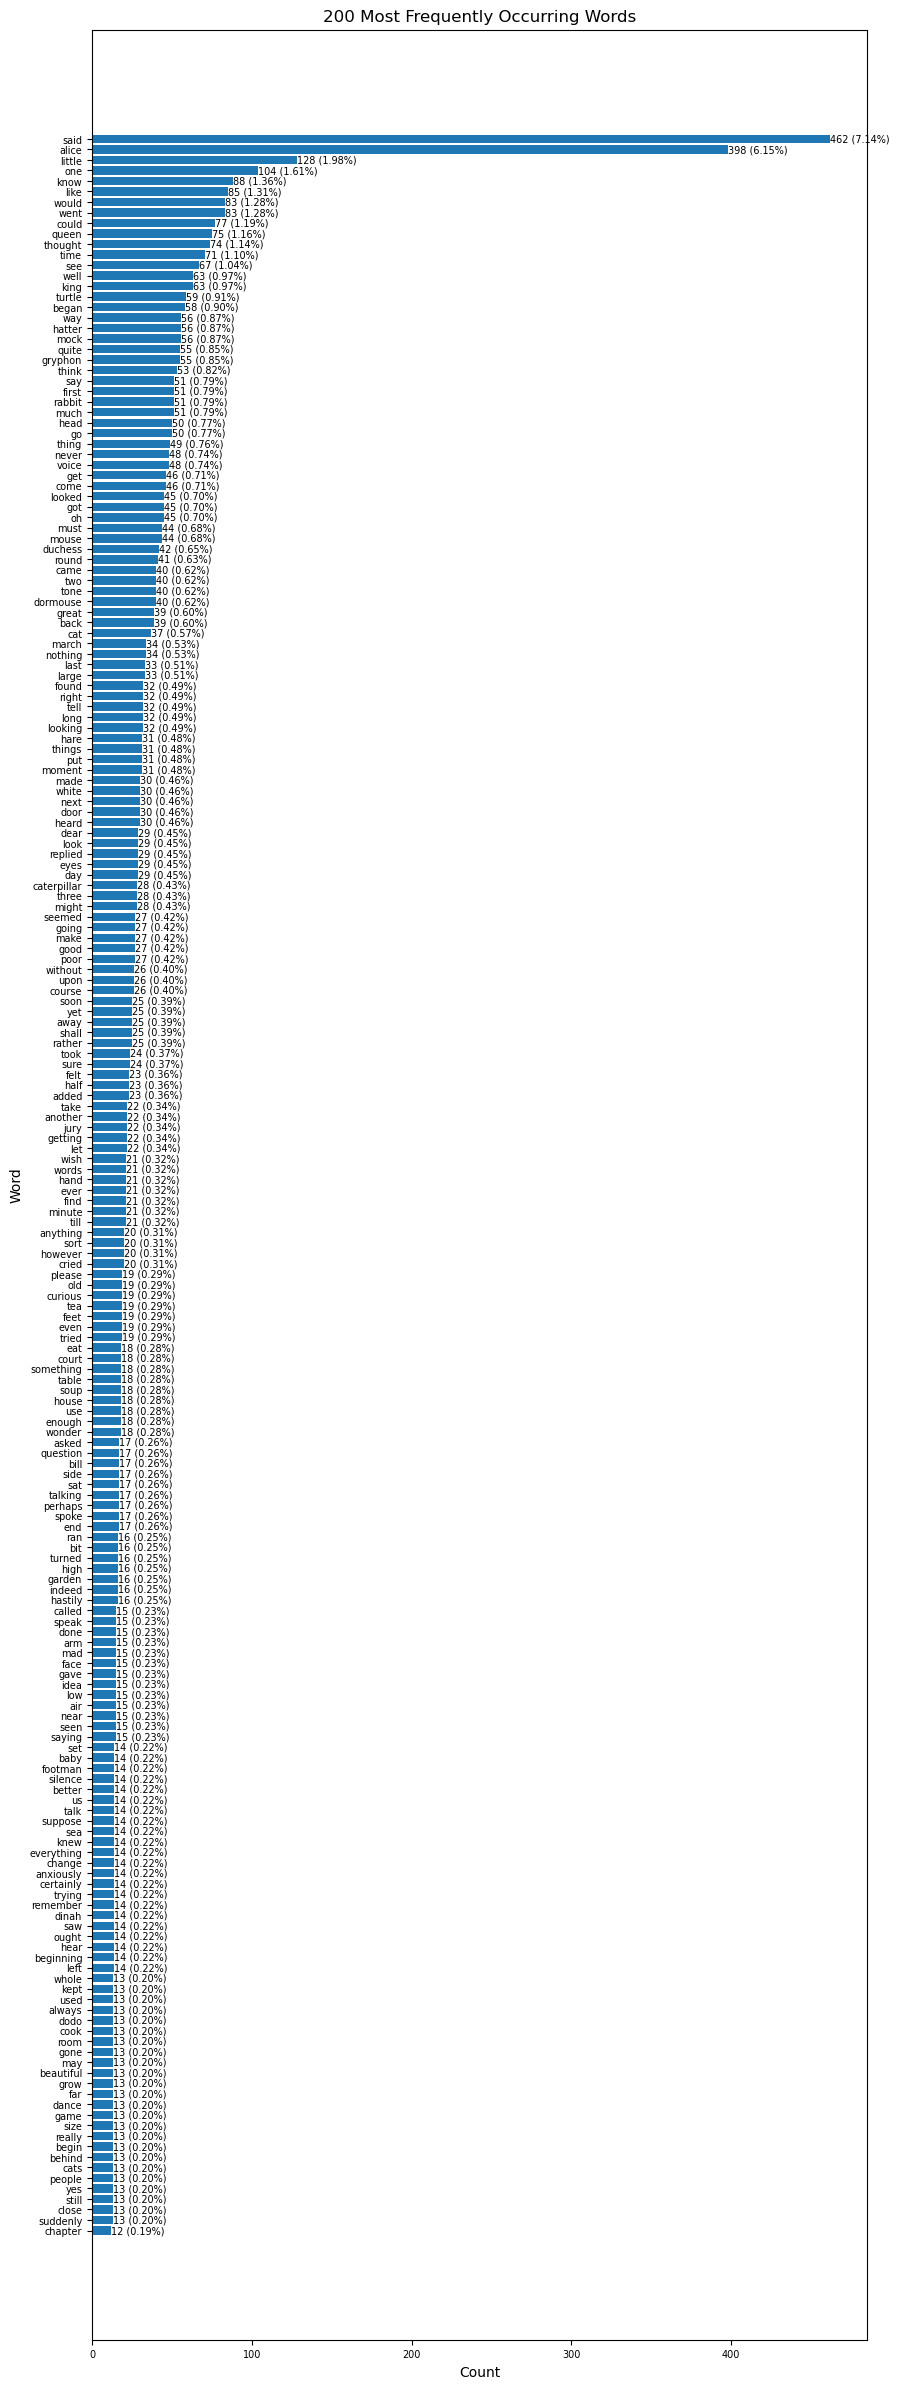

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(filtered_word_counts[:200], columns=['Word', 'Count'])
total_count = df['Count'].sum()
df['Percent'] = (df['Count'] / total_count) * 100

# Sort the DataFrame in descending order by 'Count'
df = df.sort_values('Count', ascending=True)

# Increase the horizontal size of the figure
fig, ax = plt.subplots(figsize=(10, 30))

# Create the horizontal bar chart
ax.barh(df['Word'], df['Count'])

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Word')
ax.set_title('200 Most Frequently Occurring Words')

# Set the font size for y-axis and x-axis tick labels
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Add count and percent labels to the end of each bar
for i, (count, word) in enumerate(zip(df['Count'], df['Word'])):
    ax.text(count, i, f"{count} ({df['Percent'].iloc[i]:.2f}%)", ha='left', va='center', fontsize=7)


# Show the chart
plt.show()

**Part 3: Zipf's Law**   
Zipf's law holds that the frequency of a word in a text is inversely proportional to a word's rank.  According to the law, "the word in the position n appears 1/n times as often as the most frequent one(word)."(1)  As such, the most common word occurs twice as frequently as the second most occurring word.  Likewise, the third most frequently occurring word would occur with one-third the frequency of the most frequency occurring word.  

In order to test Zipf's law, we first have to create a new variable, 'rank', which ranks the words by order of frequency.  We also created another new variable, 'Zipfs_Expected_Frequency', which denotes the expected frequency according to Zipf's law. 

From inspecting the below dataframe, it becomes clear that the corpus at best approximates frequencies expected under Zipf's law.  The second word, 'alice', is off by a frequency of approximately 200, while the rest of the top ten words at best only approximate the expected frequencies.  When we graph the expected frequencies versus the actual frequencies, however, Zipf's law does appear to be upheld, even if it is only approximate.

     Word  Count  Rank  Zipfs_Expected_Frequency
0    said    462   1.0                462.000000
1   alice    398   2.0                231.000000
2  little    128   3.0                154.000000
3     one    104   4.0                115.500000
4    know     88   5.0                 92.400000
5    like     85   6.0                 77.000000
6   would     83   7.0                 66.000000
7    went     83   7.0                 66.000000
8   could     77   8.0                 57.750000
9   queen     75   9.0                 51.333333


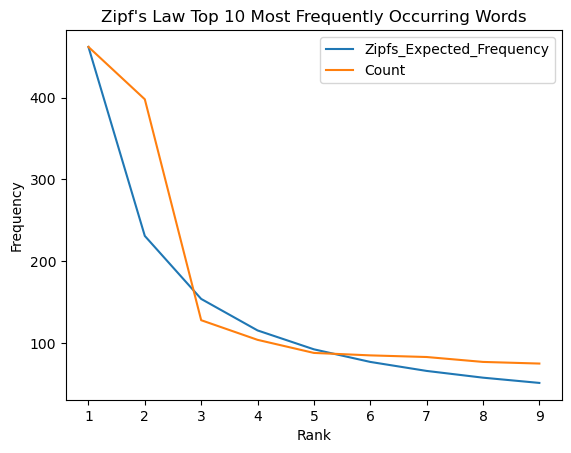

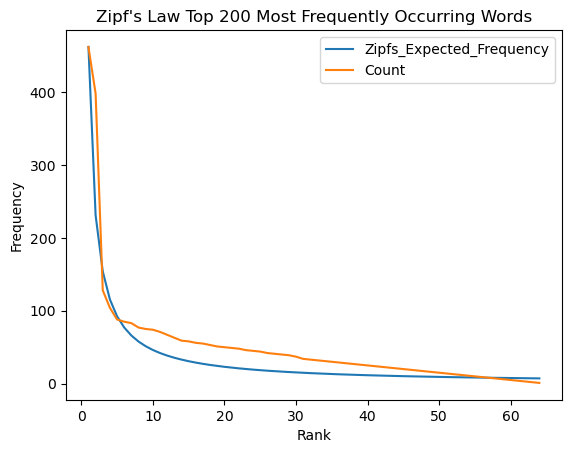

In [50]:
# Convert the list to a DataFrame
filtered_word_counts_df = pd.DataFrame(filtered_word_counts, columns=['Word', 'Count'])

# Add the 'Rank' column based on count frequencies
filtered_word_counts_df['Rank'] = filtered_word_counts_df['Count'].rank(ascending=False, method='dense')

# Calculate the frequency of the first number divided by the word rank
filtered_word_counts_df['Zipfs_Expected_Frequency'] = filtered_word_counts_df['Count'].iloc[0] / filtered_word_counts_df['Rank']

print(filtered_word_counts_df.head(10))



# Convert the list to a DataFrame
filtered_word_counts_df = pd.DataFrame(filtered_word_counts, columns=['Word', 'Count'])

# Add the 'Rank' column based on count frequencies
filtered_word_counts_df['Rank'] = filtered_word_counts_df['Count'].rank(ascending=False, method='dense')

# Calculate the frequency of the first number divided by the word rank
filtered_word_counts_df['Zipfs_Expected_Frequency'] = filtered_word_counts_df['Count'].iloc[0] / filtered_word_counts_df['Rank']

# Filter the DataFrame to include only the top ten most frequent words
filtered_word_counts_df = filtered_word_counts_df.head(10)

# Create the line chart
plt.plot(filtered_word_counts_df['Rank'], filtered_word_counts_df['Zipfs_Expected_Frequency'], label='Zipfs_Expected_Frequency')
plt.plot(filtered_word_counts_df['Rank'], filtered_word_counts_df['Count'], label='Count')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Top 10 Most Frequently Occurring Words')

# Add a legend
plt.legend()

# Display the chart
plt.show()

###################################################3

# Convert the list to a DataFrame
filtered_word_counts_df = pd.DataFrame(filtered_word_counts, columns=['Word', 'Count'])

# Add the 'Rank' column based on count frequencies
filtered_word_counts_df['Rank'] = filtered_word_counts_df['Count'].rank(ascending=False, method='dense')

# Calculate the frequency of the first number divided by the word rank
filtered_word_counts_df['Zipfs_Expected_Frequency'] = filtered_word_counts_df['Count'].iloc[0] / filtered_word_counts_df['Rank']

# Create the line chart
plt.plot(filtered_word_counts_df['Rank'], filtered_word_counts_df['Zipfs_Expected_Frequency'], label='Zipfs_Expected_Frequency')
plt.plot(filtered_word_counts_df['Rank'], filtered_word_counts_df['Count'], label='Count')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Top 200 Most Frequently Occurring Words')

# Add a legend
plt.legend()

# Display the chart
plt.show()

Finally, we plot the log of the frequency versus the log of the rank for the top 200 most common words to take a closer look at Zipf's law.  A loglog graph which would adhere to Zipf's law would be a straight, inverse line denoting an indirect relationship.  A regression line was plotted to demonstrate the indirect relationship between frequency and rank.

As demonstrated below, Zipf's law appears at best to approximate the frequency of the words in the corpus.  The line graph does indicate an indirect relationship, but the line is not perfectly straight.

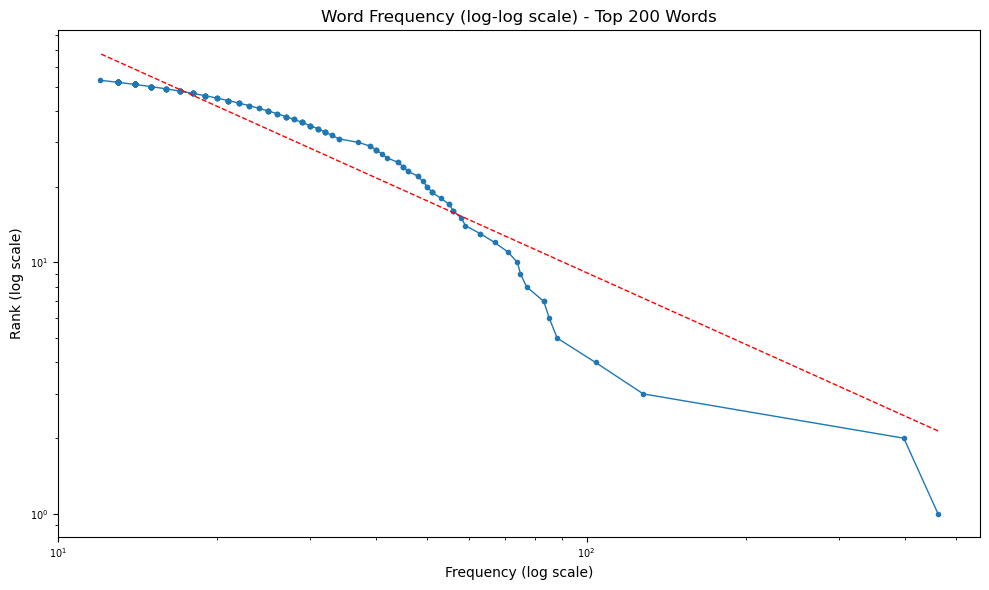

In [51]:

import numpy as np
from sklearn.linear_model import LinearRegression

# Sort the DataFrame in descending order by 'Count'
df = filtered_word_counts_df.sort_values('Count', ascending=False)

# Select the top 200 rows
top_200 = df.head(200)
#print(top_200)
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the log-log graph
ax.loglog(top_200['Count'], top_200['Rank'], marker='o', markersize=3, linewidth=1)

# Fit a linear regression line
X = np.log(top_200['Count'].values.reshape(-1, 1))
y = np.log(top_200['Rank'].values.reshape(-1, 1))
reg = LinearRegression().fit(X, y)
trend_line = np.exp(reg.predict(X))
ax.loglog(top_200['Count'], trend_line, color='red', linestyle='--', linewidth=1)

# Set the labels and title
ax.set_xlabel('Frequency (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_title('Word Frequency (log-log scale) - Top 200 Words')

# Set the font size for y-axis and x-axis tick labels
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Show the chart
plt.tight_layout()
plt.show()

Finally, we tested Zipf's law against the dataset which included stop words but excluded numbers and symbols.  Although an indirect relationship was noted, Zipf's law appeared to be less applicable when including stop words.  We would expect the angle to more resemble a 45 degree angle.  It appears the inclusion of the stop words lessened the applicability of Zipf's law to this corpus.

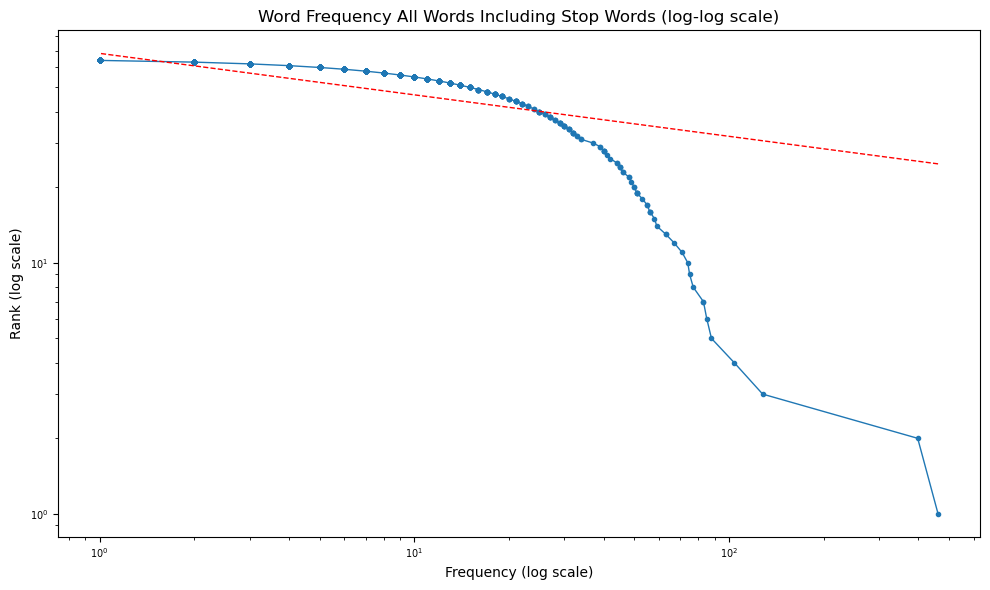

In [52]:



# Sort the DataFrame in descending order by 'Count'
df = filtered_word_counts_df.sort_values('Count', ascending=False)
#print(df)
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the log-log graph
ax.loglog(df['Count'], df['Rank'], marker='o', markersize=3, linewidth=1)

# Fit a linear regression line
X = np.log(df['Count'].values.reshape(-1, 1))
y = np.log(df['Rank'].values.reshape(-1, 1))
reg = LinearRegression().fit(X, y)
trend_line = np.exp(reg.predict(X))
ax.loglog(df['Count'], trend_line, color='red', linestyle='--', linewidth=1)

# Set the labels and title
ax.set_xlabel('Frequency (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_title('Word Frequency All Words Including Stop Words (log-log scale)')

# Set the font size for y-axis and x-axis tick labels
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Show the chart
plt.tight_layout()
plt.show()

**Conclusion**
The exclusion of numbers and symbols, and in this case stop words, provided a more accurate analysis of this corpus.  Interesting to note, 123 words made up 50% of the words utilized by frequency in this corpus.  The frequency of the words in the corpus roughly approximated those expected under Zipf's law when stop words were excluded.  The inclusion of stop words resulted in less of an adherence to Zipf's law.   

**Reference**
(1) TechTarget. (n.d.). What is Zipf's Law? Retrieved from https://www.techtarget.com/whatis/definition/Zipfs-Law